1. Use Splinter and/or Beautiful Soup to scrape mercadolibre.com.mx or soundcloud.com or tripadvisor.com. You must programmatically click a link from the front page to go to another page of interest to you and then select at least 5 items from that page. The 5 items must be stored in a data structure that makes sense (dictionary, list, etc).

In [1]:
#bs4 for webscraping
from bs4 import BeautifulSoup as bs

#import requests so we can understand what is happening on the page
import requests
import pandas as pd

#Necessary Imports for Chrome Browser
from splinter import Browser
#Chrome: used for automated testing too
from webdriver_manager.chrome import ChromeDriverManager
import time

In [2]:
#The tripadvisor link did not work for me.


#save website as a variable and programatically interact with it later
url ='https://soundcloud.com/'

#lets see what the response is when we send an request
response = requests.get(url)
response

<Response [200]>

## Chrome Driver:
- Will open up a browser and will do what you tell it to in the background.

In [5]:
#OPENING A BLANK CHROME BROWSER

#The below code is the executable path for chrome browser
# We will install it each time
executable_path = {'executable_path':ChromeDriverManager().install()}

# Connect to the chrome browser by passing the executable path which is where the 
#chrome browser is located on the this machine.
# Headless chrome false means we wont't actually see the chrome page but rather a blank browser 
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/ayeshapatel/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


### Programatically accessing soundcloud.com

In [6]:
#direct browser to home page
url = 'https://soundcloud.com/'

#pass in URL into browser programatically
browser.visit(url)

### Find the link and "click" on it

#### This is what I see when I hover over the "Explore trending playlists" link
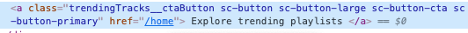

In [7]:
#Now that I located the button in the html file, I can programatically click on 
#the button by referencing it as it is referenced in the screenshot above
browser.links.find_by_partial_text('Explore trending playlists').click()

#if the browser is not loading completely..
time.sleep(1)

### Breakdown html file to identify the parts in it by 'parsing'

In [68]:
#parse html file  from current url
soup = bs(browser.html, 'html.parser')

#prettify just formats the html file better, lets us clean up json or html 
#so its easier to read


#print(soup.prettify())

### Extracting divs containing description of playlists

In [10]:
#This will extract all the divs with the playlist description!
all_divs = soup.find_all('div', class_='mixedSelectionModule__title')
all_divs

[<div class="mixedSelectionModule__title">
 <h2 class="mixedSelectionModule__titleText" data-test-id="selection__title-text">Charts: Top 50</h2>
 <p class="mixedSelectionModule__description sc-type-small sc-text-body sc-type-light sc-text-secondary">The most played tracks on SoundCloud this week</p>
 </div>,
 <div class="mixedSelectionModule__title">
 <h2 class="mixedSelectionModule__titleText" data-test-id="selection__title-text">Charts: New &amp; hot</h2>
 <p class="mixedSelectionModule__description sc-type-small sc-text-body sc-type-light sc-text-secondary">Up-and-coming tracks on SoundCloud</p>
 </div>,
 <div class="mixedSelectionModule__title">
 <h2 class="mixedSelectionModule__titleText" data-test-id="selection__title-text">Rap</h2>
 <p class="mixedSelectionModule__description sc-type-small sc-text-body sc-type-light sc-text-secondary">The latest and hottest rap</p>
 </div>,
 <div class="mixedSelectionModule__title">
 <h2 class="mixedSelectionModule__titleText" data-test-id="sele

In [11]:
five_divs= all_divs[:5]

In [12]:
five_divs

[<div class="mixedSelectionModule__title">
 <h2 class="mixedSelectionModule__titleText" data-test-id="selection__title-text">Charts: Top 50</h2>
 <p class="mixedSelectionModule__description sc-type-small sc-text-body sc-type-light sc-text-secondary">The most played tracks on SoundCloud this week</p>
 </div>,
 <div class="mixedSelectionModule__title">
 <h2 class="mixedSelectionModule__titleText" data-test-id="selection__title-text">Charts: New &amp; hot</h2>
 <p class="mixedSelectionModule__description sc-type-small sc-text-body sc-type-light sc-text-secondary">Up-and-coming tracks on SoundCloud</p>
 </div>,
 <div class="mixedSelectionModule__title">
 <h2 class="mixedSelectionModule__titleText" data-test-id="selection__title-text">Rap</h2>
 <p class="mixedSelectionModule__description sc-type-small sc-text-body sc-type-light sc-text-secondary">The latest and hottest rap</p>
 </div>,
 <div class="mixedSelectionModule__title">
 <h2 class="mixedSelectionModule__titleText" data-test-id="sele

In [50]:
title_list = []
for title in five_divs:
    titles = title.find('h2').text
    title_list.append(titles)

In [51]:
title_list

['Charts: Top 50', 'Charts: New & hot', 'Rap', 'New Music Now', 'Party Music']

### Extracting Playlists

In [17]:
#This variable will extract all of the playlists
all_groups_of_songs = soup.find_all('div', class_='playableTile__artwork')

[<div class="playableTile__artwork">
 <a class="playableTile__artworkLink" href="/discover/sets/charts-top:all-music:us">
 <div class="playableTile__image">
 <div class="image image__lightOutline sc-artwork sc-artwork-placeholder-2 m-loaded" style="height: 100%; width: 100%;">
 <span aria-label="Top 50: All music genres" aria-role="img" class="sc-artwork sc-artwork-placeholder-2 image__full g-opacity-transition" style='background-image: url("https://i1.sndcdn.com/artworks-1Hod1KTMNrTcNumy-qzJjqw-t200x200.jpg"); width: 100%; height: 100%; opacity: 1;'></span>
 </div>
 </div>
 </a>
 <div class="playableTile__imageOverlay"></div>
 <div class="playableTile__playButton g-z-index-content">
 <a class="sc-button-play playButton sc-button m-stretch" draggable="true" href="" role="button" tabindex="0" title="Play">Play</a>
 </div>
 <div class="playableTile__actions">
 <div class="playableTile__actionWrapper">
 <button aria-describedby="tooltip-17615" aria-label="Like" class="sc-button-like playa

In [47]:
group_list=[]
for group in all_groups_of_songs[:22]:
    group = group.find('span')['aria-label']
    group_list.append(group)

In [48]:
group_list

['Top 50: All music genres',
 'Top 50: Hip-hop & Rap',
 'Top 50: Pop',
 'Top 50: R&B & Soul',
 'Top 50: Global Beats',
 'New & hot: All music genres',
 'New & hot: Hip-hop & Rap',
 'New & hot: Pop',
 'New & hot: R&B & Soul',
 'New & hot: Global Beats',
 "Tomorrow's Rap Hits: The Lookout",
 "Best Rap Right Now: Drippin'",
 "Feel-Good Hip-Hop: Boomin'",
 'New Plugg Music',
 'Light, Breezy Rap: Gloss',
 "Best Rap Right Now: Drippin'",
 'Fresh Pop Picks: Ear Candy',
 'Fresh Pressed Tracks',
 'Best New R&B: Vibes',
 'New EDM Hits: On The Up',
 'Hip-Hop Party Starters: Turn Up',
 'Pop Party Hits: Dialed In']

In [58]:
final_group_list = []
final_group_list.append(group_list[1])
final_group_list.append(group_list[7])
final_group_list.append(group_list[10])
final_group_list.append(group_list[13])
final_group_list.append(group_list[21])

### Creating DataFrame

In [59]:
final_group_list

['Top 50: Hip-hop & Rap',
 'New & hot: Pop',
 "Tomorrow's Rap Hits: The Lookout",
 'New Plugg Music',
 'Pop Party Hits: Dialed In']

In [60]:
title_list

['Charts: Top 50', 'Charts: New & hot', 'Rap', 'New Music Now', 'Party Music']

In [66]:
soundcloud_df = pd.DataFrame(
    {'Description': title_list,
     'Playlist': final_group_list
    })

In [67]:
soundcloud_df

,Description,Playlist
0,Charts: Top 50,Top 50: Hip-hop & Rap
1,Charts: New & hot,New & hot: Pop
2,Rap,Tomorrow's Rap Hits: The Lookout
3,New Music Now,New Plugg Music
4,Party Music,Pop Party Hits: Dialed In


2. Share with your group how web scraping worked on the website and link you chose. Compare it with others. List the site you chose and two observations about parsing the website. Indicate if this was the same or different for the sites chosen by others.

I chose to use soundcloud. I programatically accessed the explore page and extracted the following information: the description of playlists and one playlist from each of the five sections (seen on the explore page). One of the things I noticed was that when I was trying to extract the title, I could  not just pass in 'h2' and the class name since the title was part of the text and not class. 